<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/G100A007_0610ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#include <math.h>

#define B1  4
#define B2  7
#define LED 13

#define PERCEPTRON  3

int X[1][2]  = { {1,0} };

/*these matrices was calculated by python */
float W1[2][PERCEPTRON] =   {
                    {0.38492545, 3.94078829, 4.24865286}, 
                    {3.83936678, 0.20450267, 4.27767947}
                   };
float W2[PERCEPTRON][1] =   { {-2.6730679}, 
                     {-2.3817902}, 
                    {4.99647104} };
float Wo1[1][PERCEPTRON];
float sum = 0;
float Y = 0;

/*sigmoid function*/
float sigmoid (float x)
{
    return 1/(1 + exp(-x));
}

void setup()
{
  Serial.begin(115200);

  pinMode(B1, INPUT); 
  pinMode(B2, INPUT); 
  pinMode(LED, OUTPUT);

  digitalWrite(LED, LOW);
}

void loop()
{
  X[0][0] = digitalRead(B1);
  X[0][1] = digitalRead(B2);
  Serial.print("Button 1:"); Serial.print(X[0][0]);
  Serial.print("\tButton 2:"); Serial.println(X[0][1]);

  /* calculate forward part based on weights */
  //hidden layer
  for(int i=0; i<1; i++)
  {
      for(int j=0;j <PERCEPTRON; j++)
      {
          for(int k=0; k<2; k++)
          {
              sum += X[i][k]*W1[k][j];
          }
          Wo1[i][j] = sigmoid(sum);
          sum = 0;  
      }
  }
  //output layer
  for(int i=0; i<1; i++)
  {
      for(int j=0;j <1; j++)
      {
          for(int k=0; k<PERCEPTRON; k++)
          {
              Y += Wo1[i][k]*W2[k][j];
          } 
      }
  }

  Serial.println(Y, 2);

  Y = round(Y);
  if (int(Y) == 1)
    Serial.println("---- Should be... ON ----");
  else
    Serial.println("---- Should be... OFF ----");
  digitalWrite(LED, int(Y));
  Y = 0;

  delay(2000);
}

SyntaxError: ignored

In [ ]:
import numpy as np


# Times to run
epoch = 10000


# There are 2 inputs
inputLayerSize = 2


# NN nodes
hiddenLayerSize = 3


# Only one output
outputLayerSize = 1


L=0.1


# There are 2 inputs for XOR
X = np.array( [ [0,0], [0,1], [1,0], [1,1] ] )


# The truth table of XOR
# ANN just can learn from truly examples!!!
#     (adjust the weight and bias to make output is getting close to target by input)
Y = np.array( [ [0], [1], [1], [0] ] )


def sigmod(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_deriv(x):
	return x * (1 - x)
	
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize, outputLayerSize))


for i in range(epoch):
  H = sigmod(np.dot(X, Wh))
  Z = np.dot(H, Wz)
  E = Y - Z
  dZ = E * L
  Wz += H.T.dot(dZ)
  dH = dZ.dot(Wz.T) * sigmoid_deriv(H)
  Wh +=  X.T.dot(dH)


print("**************** error ****************") 
print(E)
print("***************** output **************") 
print(Z)   
print("*************** weights ***************") 
print("input to hidden layer weights: ")     
print(Wh)
print("hidden to output layer weights: ")
print(Wz)

**************** error ****************
[[-3.77814599e-07]
 [ 4.56158989e-07]
 [ 5.04131912e-07]
 [-6.94601447e-07]]
***************** output **************
[[3.77814599e-07]
 [9.99999544e-01]
 [9.99999496e-01]
 [6.94601447e-07]]
*************** weights ***************
input to hidden layer weights: 
[[ 4.37953108  0.0306285   0.92571624]
 [ 4.32386247 -1.62363698  0.57830025]]
hidden to output layer weights: 
[[ 4.69344926]
 [ 1.31331238]
 [-6.00676088]]


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)


# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將 training 的 input 資料轉為3維，並 normalize 把顏色控制在 0 ~ 1 之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)


# 建立簡單的線性執行的模型
model = Sequential()
# 加 RNN 隱藏層(hidden layer)
model.add(SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape 的 batch_size 需設為 None.
    # 否則執行 model.evaluate() 會有錯誤產生.
    batch_input_shape=(None, 28, 28), 
    units= 50,
    unroll=True,
)) 
# 加 output 層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 一批訓練多少張圖片
BATCH_SIZE = 50     
BATCH_INDEX = 0     
# 訓練模型 4001 次
for step in range(1, 4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    # 逐批訓練
    loss = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    # 每 500 批，顯示測試的準確率
    if step % 500 == 0:
        # 模型評估
        loss, accuracy = model.evaluate(X_test, y_test, batch_size=y_test.shape[0], 
            verbose=False)
        print("test loss: {}  test accuracy: {}".format(loss,accuracy))
        

# 預測(prediction)
X = X_test[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

# 模型結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("SimpleRNN.config", "w") as text_file:
    text_file.write(json_string)
    
# 模型訓練結果存檔
model.save_weights("SimpleRNN.weight")

ImportError: ignored

In [ ]:
# Python sample to build a 2 layer feed forward neural network with back propagation
# Source: https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6
# Accessed: 2019-08-04

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4)
        self.weights2   = np.random.rand(4,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
 
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
 
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T)
                            * sigmoid_derivative(self.layer1)))
 
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [ ]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # seeding for random number generation
        np.random.seed(1)
        
        #converting weights to a 3 by 1 matrix with values from -1 to 1 and mean of 0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #computing derivative to the Sigmoid function
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations):
        
        #training the model to make accurate predictions while adjusting weights continually
        for iteration in range(training_iterations):
            #siphon the training data via  the neuron
            output = self.think(training_inputs)

            #computing error rate for back-propagation
            error = training_outputs - output
            
            #performing weight adjustments
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))

            self.synaptic_weights += adjustments

    def think(self, inputs):
        #passing the inputs via the neuron to get output   
        #converting values to floats
        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


if __name__ == "__main__":

    #initializing the neuron class
    neural_network = NeuralNetwork()

    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)

    #training data consisting of 4 examples--3 input values and 1 output
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])

    training_outputs = np.array([[0,1,1,0]]).T

    #training taking place
    neural_network.train(training_inputs, training_outputs, 15000)

    print("Ending Weights After Training: ")
    print(neural_network.synaptic_weights)

    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(neural_network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Wow, we did it!")


Beginning Randomly Generated Weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Ending Weights After Training: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]


KeyboardInterrupt: ignored

In [ ]:
   
#include <stdio.h>   // Needed to use IO functions
 
int main() {
   int sumOdd  = 0; // For accumulating odd numbers, init to 0
   int sumEven = 0; // For accumulating even numbers, init to 0
   int upperbound;  // Sum from 1 to this upperbound
   int absDiff;     // The absolute difference between the two sums
 
   // Prompt user for an upperbound
   printf("Enter the upperbound: ");
   scanf("%d", &upperbound);   // Use %d to read an int
 
   // Use a while-loop to repeatedly add 1, 2, 3,..., to the upperbound
   int number = 1;
   while (number <= upperbound) {
      if (number % 2 == 0) {  // Even number
         sumEven += number;   // Add number into sumEven
      } else {                // Odd number
         sumOdd += number;    // Add number into sumOdd
      }
      ++number; // increment number by 1
   }
 
   // Compute the absolute difference between the two sums
   if (sumOdd > sumEven) {
      absDiff = sumOdd - sumEven;
   } else {
      absDiff = sumEven - sumOdd;
   
   }
   // Print the results
   printf("The sum of odd numbers is %d.\n", sumOdd);
   printf("The sum of even numbers is %d.\n", sumEven);
   printf("The absolute difference is %d.\n", absDiff);
 
   return 0;
}


SyntaxError: ignored

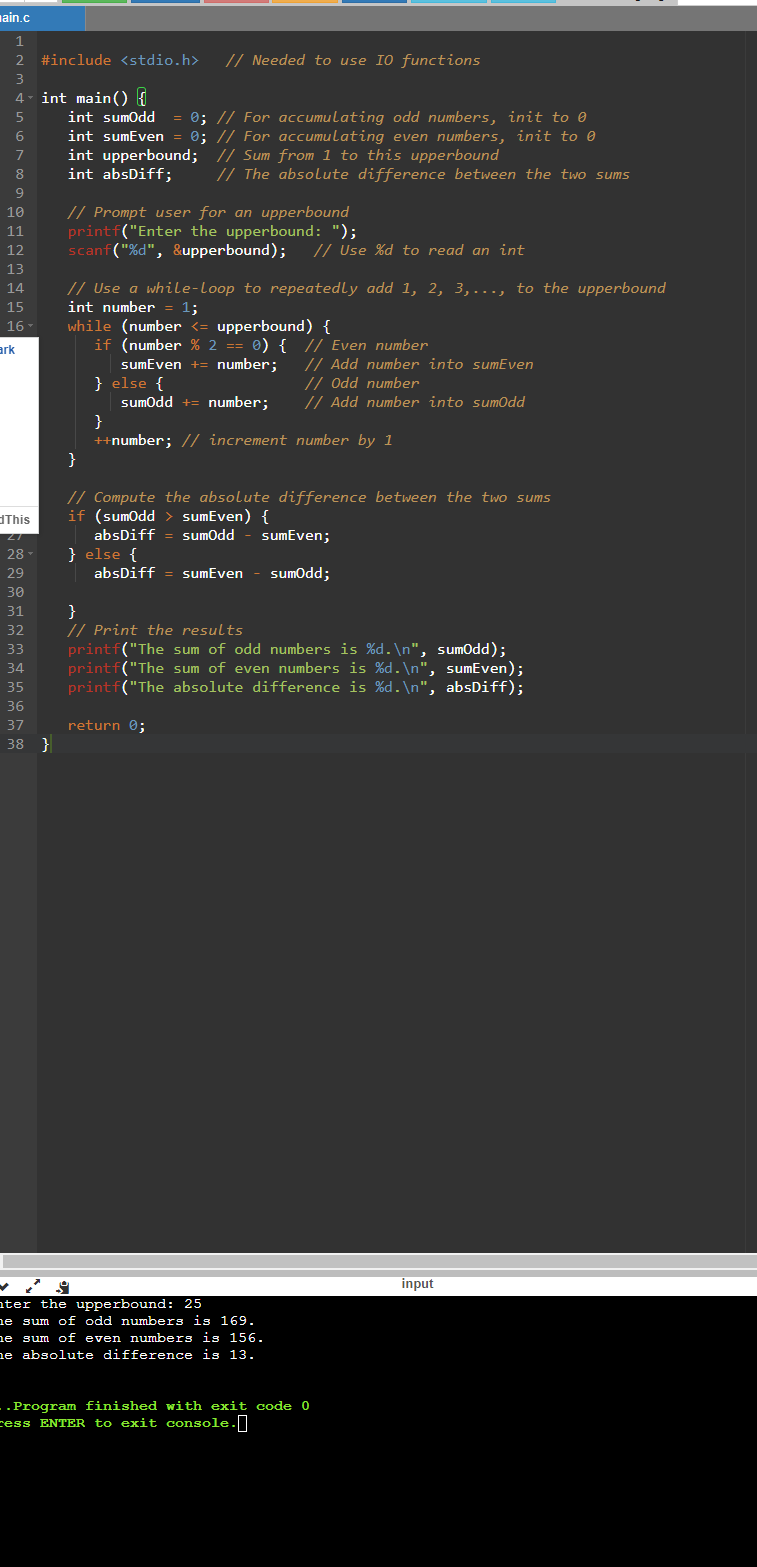